# Importer les librairies

In [1]:
import pandas as pd # Manipulation et analyse de données
# Visualisation
import seaborn as sns  # Bibliothèque de visualisation de données construite au-dessus de matplotlib
import matplotlib.pyplot as plt # Collection de fonctions qui permettent la réalisation de visualisation graphique
from scipy import stats #Bibliothèque utilisée pour des calculs statistiques (ex : t-test et p-valeur)


# IMPORTER LES LIBRAIRIES NECESSAIRES A L'ETUDE

# Importer les données

In [2]:
# Loader les data
data = pd.read_csv("titanic.csv")
# Afficher la variable data correspondant aux données de base
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Questions

## 1. Préparation des données

Remplissez la function `preprocess` ci-dessus. Celle-ci doit:
1. Supprimez les colonnes `PassengerId`, `Name`, `Ticket`, `Cabin`.
2. Supprimez les lignes contenant au moins une valeur manquante.
3. Créer une variable `FamilySize` qui est correspond à `SibSp` + `Parch` + 1. Supprimez les variables `SibSp` et `Parch`.
4. Recalculer le prix du billet `Fare` en divisant `Fare` par `FamilySize`.
5. Encoder les variables qualitatives `Sex` et `Embarked` avec l'argument `drop_first=True`.

In [3]:
def preprocess(data: pd.DataFrame) -> pd.DataFrame:
    
    """La fonction prépare les données à l'analyse.
    
    Args:
        data (pd.DataFrame): La dataframe originale
        
    Returns:
        pd.DataFrame: La dataframe preprocessé et prête à être analysée.
    """
    
    # Faire une copy de la dataframe originale
    data_preprocessed = data.copy()
    
    # Supprimez les variables `PassengerId`, `Name`, `Ticket` & `Cabin`
    data_preprocessed.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
    # inplace=True indique que la modification doit être effectuée directement sur le DataFrame
    
    # Supprimez lignes contenant au moins une valeur manquante
    data_preprocessed.dropna(axis=0, inplace=True)
    # axis=0 pour supprimer les lignes et non les colonnes 
    
    # Créer une variable `FamilySize` et supprimez les variables `SibSp` et `Parch`
    data_preprocessed['FamilySize']=data_preprocessed['SibSp']+data_preprocessed['Parch']+1
    data_preprocessed.drop(columns=["SibSp", "Parch"], inplace=True)
    
    # Recalculer le prix du billet
    data_preprocessed['Fare']=data_preprocessed['Fare']/data_preprocessed['FamilySize']
    
    # Encoded (OHE) `Sex` et `Embarked`
    data_preprocessed = pd.get_dummies( # pd.get_dummies permet le One-Hot Encoding
        data=data_preprocessed, # Les données sur lesquelles travailler
        columns=["Sex","Embarked"], # Les colonnes à encoder
        drop_first=True # Supprime la première colonne dummy
    )
        
    # CHECK: NE PAS TOUCHER
    for col in ["PassengerId", "Name", "Ticket", "Cabin", "SibSp", "Parch"]:
        assert col not in data_preprocessed, f"{col} n'a pas été retiré."
    assert data_preprocessed.isna().sum().sum() == 0, "Il reste encore des NaN à supprimer."
    assert "FamilySize" in data_preprocessed.columns, "La colonne `FamilySize` n'a pas été créée."
    assert data_preprocessed.loc[0, "Fare"] == 3.625, "La colonne `Fare` n'a pas été recalculée."
    for col in [col for col in data_preprocessed if col.startswith("Embarked")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."
    for col in [col for col in data_preprocessed if col.startswith("Sex")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."
    
    return data_preprocessed

Le résultat de la function doit vous donner exactement le tableau ci-dessous.

In [4]:
# Preprocess les données à l'aide de la function `preprocess`
data_clean = preprocess(data)
display(data_clean)

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,3.625000,2,1,0,1
1,1,1,38.0,35.641650,2,0,0,0
2,1,3,26.0,7.925000,1,0,0,1
3,1,1,35.0,26.550000,2,0,0,1
4,0,3,35.0,8.050000,1,1,0,1
...,...,...,...,...,...,...,...,...
885,0,3,39.0,4.854167,6,0,1,0
886,0,2,27.0,13.000000,1,1,0,1
887,1,1,19.0,30.000000,1,0,0,1
889,1,1,26.0,30.000000,1,1,0,0


## 2. Inférence statistique (4 pts)

**Q1: L'âge moyen des passagers du Titanic est-il est le même que l'âge moyen de la population en 1912 (28 ans)?**
Non, la moyenne n'est pas la même. 29.642 contre 28 ans.

In [5]:
#1. Variable : âge, type quantitative
# Âge moyen des passagers
age_mean = data_clean["Age"].mean() 
print(age_mean)

29.64209269662921


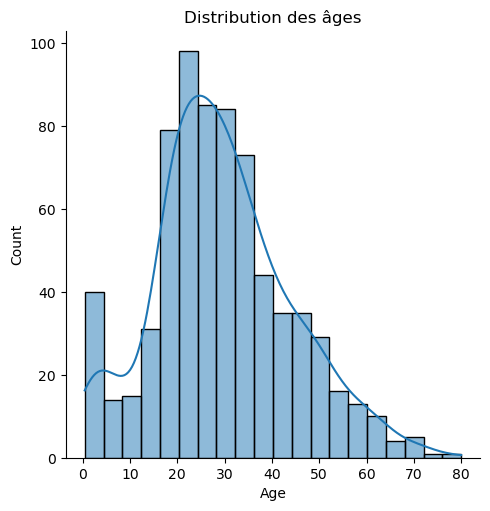

In [6]:
#Visualisation
#Histogramme de l'âge de tous les passagers du Titanic
sns.displot(
    data=data_clean, # notre dataframe
    x="Age", # colonne qui nous intéresse
    kde=True # ajouter une courbe d'estimation
)
plt.title("Distribution des âges")
plt.show()

$H_0: \mu_{\text{moyenne age titanic}} = \mu_{\text{moyenne age population_1912}}$, $H_1: \mu_{\text{moyenne age titanic}} \ne \mu_{\text{moyenne age population 1912}}$

C'est un T-TEST car une seule variable et nous ne connaissons pas l'écart de la population car il n'est pas donné

Les assumptions pour un T-TEST sont :

    - L'échantillon est aléatoire
    - La taille de l'échantillon est supérieur à 30, ou la population est normalement distribuée
Pour vérifier la taille de l'échantillon, il suffit consulter le nombre de lignes dans le "data_clean" --> 712 rows

In [7]:
alpha = 0.05 #Seuil de 5% comme utilisé en classe
ages = data_clean['Age'] #Tableau de tous les âges à partir de notre data frame clean

#stats.ttest_1samp permet de calculer le t-test en une seule ligne
t, p_valeur = stats.ttest_1samp(ages, popmean=28) #param de notre fonction, âge moyen calculé au-dessus et l'âge moyen 1912

print("La statistique t est de : " + str(t))
print("La p-valeur associée est de : " + str(p_valeur))

# Si p-valeur < alpha, on rejète l'hypothèse nulle
if p_valeur < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejète l'hypothèse nulle car p-valeur < alpha.")
    
# Si p-valeur > alpha, on ne rejète pas l'hypothèse nulle
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejète pas l'hypothèse nulle car p-valeur > alpha.")

La statistique t est de : 3.0233009800374053
La p-valeur associée est de : 0.002590259537786662
Avec un seuil alpha 0.05 on rejète l'hypothèse nulle car p-valeur < alpha.


TODO Point 8.

**Q2: La survie dépend-elle de la classe du passager?**

Survived = variable qualitative nominale
Pclass = variable qualitative ordinale

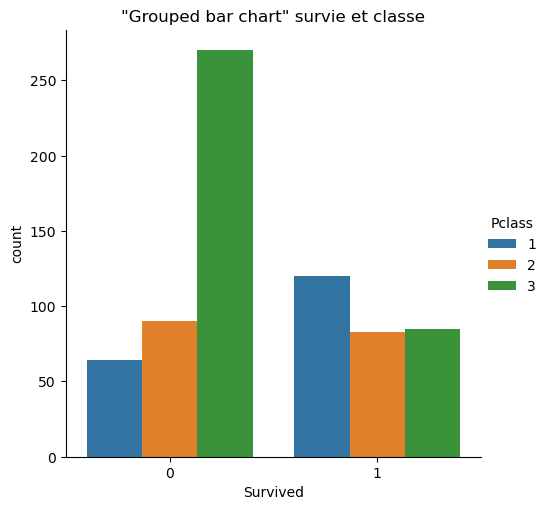

In [8]:
# Comment varie le nombre de survivants en fonction de la classe ?
sns.catplot(
    data=data_clean,
    x="Survived",
    hue="Pclass",
    kind="count" # pour obtenir le count 
)
plt.title("\"Grouped bar chart\" survie et classe")
plt.show()

Ce chart nous permet de visualiser que dans la première classe (bleue), ~2x plus de passagers ont survécu.
Le nombre de survivants est ~égal pour la deuxième classe.
Pour la troisième, ~3x de décès que de survivants.

$H_0$: La survie est **indépandente** de la classe. $H_1$: La survie n'est **pas indépendante** de la classe.

On est en présence d'un CHI-SQUARE TEST (indépendance test) car nous avons deux variables qualitatives et souhaitons savoir si elles sont dépendantes ou pas.

Les assumptions pour un CHI-SQUARE TEST sont :

    - L'échantillon est aléatoire
    - Pour chaque combinaison des niveaux des variables, nous avons besoin d’au moins 5 valeurs (validé par le grouped bar chart)
    - Les variables sont bien catégoriques.
    - Les variables sont indépendentes.

In [9]:
#Création du tableau de contingence
observed = pd.crosstab(data_clean['Survived'], data_clean['Pclass'])

# Utilisons la foncton chi2_contingency
chi2_stat, p_val, dof, ex = stats.chi2_contingency(observed) #on passe que ce paramètre à la méthode donc le tableau de contingence
#cette méthode nous retourne plusieurs éléments : Le test statistique, La p-valeur, Les degrés de liberté, Les valeurs attendues

#Affichage des résultats
print("Le test statistique est de : ", chi2_stat)
print("La p-valeur est de : ", p_val)
print("Les degrés de libertés sont de : ", dof)


Le test statistique est de :  91.08074548791019
La p-valeur est de :  1.6675060315554636e-20
Les degrés de libertés sont de :  2


Analyse des résultats :
* Le test statistique est 91.08.
* **p-valeur > seuil**.
* Les degrés de liberté sont 2 (2x1=2).          TODO Poser question à quoi ça sert ??
* Les valeurs attendues sont données (e.g., premier élément = 100x64/200 = 32)

Puisque p-valeur > seuil, on ne **rejette pas l'hypothèse nulle**. Il y a assez de preuve pour ne pas rejetter l'idée selon laquelle la survie et la classe sont indépendantes.
En d'autres termes, on ne rejette pas $H_0$ car la variables sont indépendantes l'une de l'autre.

TODO Point 8.

**Q3: Existe-t-il une différence d'âge entre les passagers qui ont survécu et les passagers décédés?**

L'âge  = variable quantitative 

Survived = variable qualitative nominale

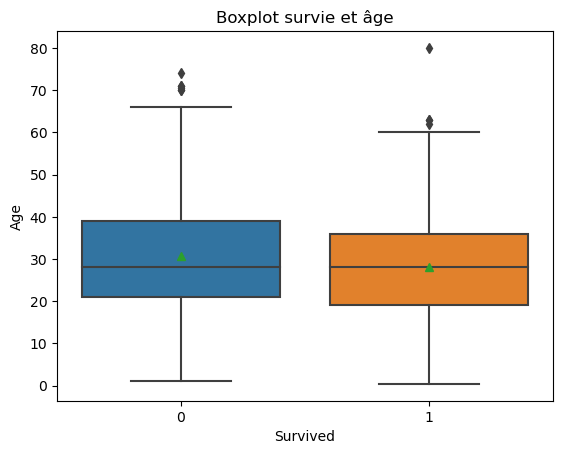

In [10]:
#Pour visualiser la relation entre une variable quantitative et une variable qualitative, on utilise un Box plot

sns.boxplot(
    data=data_clean,
    x="Survived", # qualitatif
    y="Age", # quantitatif
    showmeans=True # montrer les moyennes (False par défaut)
)

plt.title("Boxplot survie et âge")

plt.show()

Ce chart nous permet de visualiser la répartition des âges en fonction de la survie du passager ou non.
On affiche les valeurs extrèmes avec les losanges ainsi que les moyennes avec le triangle vert.

$H_0: \mu_{\text{age survivants}} = \mu_{\text{age decedes}}$, $H_1: \mu_{\text{age survivants}} \ne \mu_{\text{age decedes}}$

Les assumptions pour un T-TEST à deux échantillons sont :

    - Les échantillons sont aléatoires.
    - Les échantillons sont indépendants les uns des autres.
    - La taille des échantillons est supérieure à 30, ou les populations sont normalement distribuées.

Nombre de survivants :  288
Moyenne d'âge des survivants: 28.19329861111111
Nombre de décédés :  424
Moyenne d'âge des décédés: 30.62617924528302


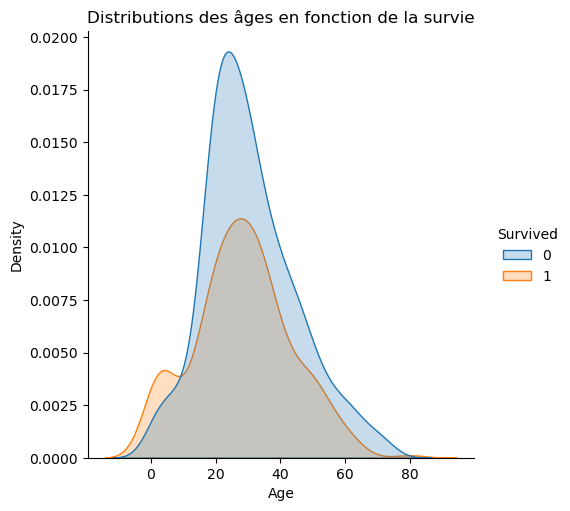

In [11]:
# Séparation des âges en fonction de la survie

#Récupération de tous les âges des survivants et des décédés sous forme de tableaux
ages_survived = data_clean[data_clean['Survived'] == 1]['Age'] 
ages_not_survived = data_clean[data_clean['Survived'] == 0]['Age']
 
# Affichage des counts et des moyennes d'âge
print('Nombre de survivants : ', ages_survived.count())
print('Moyenne d\'âge des survivants:', ages_survived.mean())
print('Nombre de décédés : ', ages_not_survived.count())
print('Moyenne d\'âge des décédés:', ages_not_survived.mean())

    
# Distributions des âges en fonction des survivants
sns.displot(
    data=data_clean,
    x="Age",
    hue="Survived",
    kind="kde",
    fill=True # remplir les distributions
)
plt.title("Distributions des âges en fonction de la survie")
plt.show()

    

Les échantillons sont indépendants car survie et non survie

Ce graphe permet de vérifier l'asumption que les populations sont normalement distribuées

Les échantillons sont > 30 comme affiché au-dessus (288 et 424)

In [12]:
# Test t pour échantillons indépendants
t_stat, p_value = stats.ttest_ind(
    ages_survived,
    ages_not_survived,
    alternative="two-sided",
    equal_var=False
)
 
# Affichage des résultats
print("Test statistique :", t_stat)
print("p-valeur :", p_value)
print("")
 
# Interprétation des résultats
alpha = 0.05
if p_value < alpha:
    print("Il existe une différence d'âge significative entre les passagers qui ont survécu et ceux qui sont décédés.")
else:
    print("Il n'existe pas de différence d'âge significative entre les passagers qui ont survécu et ceux qui sont décédés.")

Test statistique : -2.184486214939826
p-valeur : 0.02931497754601072

Il existe une différence d'âge significative entre les passagers qui ont survécu et ceux qui sont décédés.


Explication du résultat : 

Selon notre seul alpha, la différence des moyennes est significative. Lorsqu'on compare les moyennes (28 et 30), on pourrait être tenté de dire qu'elles ne sont pas si différentes. Or, notre test d'hypothèse nous indique plutôt si la différence est susceptible d'être due au hasard ou pas.

Statistiquement, la différence est importante, mais l'orsqu'un "humain" effectue cette comparaison, on a l'impression que ça ne l'est pas.

TODO Point 8.

**Q4: Existe-t-il une relation entre l'âge des passagers et le prix des billets?**

L'Âge est une variable quantitative

Le prix (Fare) est une variable quantitative

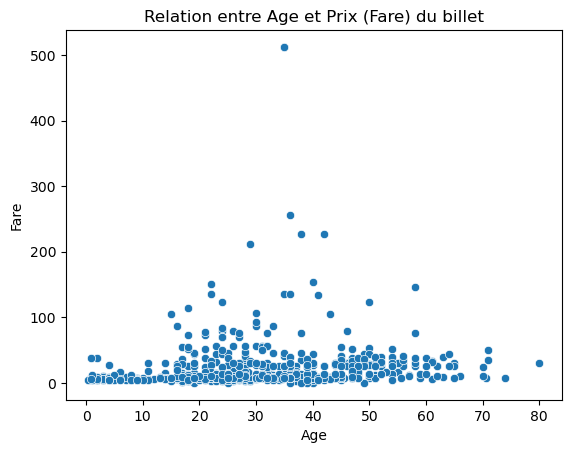

In [18]:
#Pour visualiser la relation entre une variable qualitative et une autre variable qualitative, on utilise un Scatter plot

# Scatter plot entre Age et Fare
sns.scatterplot(
    data=data_clean,
    x="Age",
    y="Fare"
)
plt.title("Relation entre Age et Prix (Fare) du billet")
plt.show()

Ce chart nous permet de visualiser la relation entre l'âge et le prix du billet.
À partir de ce graphe, nous ne pouvons tirer aucune conclusion pour l'instant.

$H_0$: $\rho$ = 0, il n'y a pas de corrélation significative entre `l'âge des passagers` et `le prix des billets` dans la population.

$H_1$: $\rho$ $\ne$ 0, il y a une corrélation significative entre `l'âge des passagers` et `le prix des billets` dans la population.

Les assumptions pour un T-TEST de corrélation à deux échantillons sont :

    - TODO

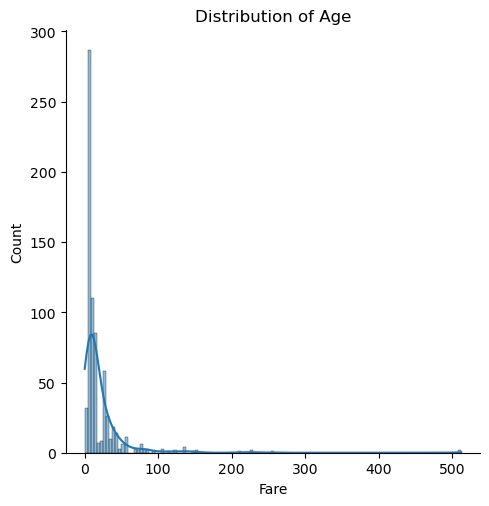

In [20]:
# Histogramme de l'âge des passagers
sns.displot(
    data=data_clean, # notre dataframe
    x="Fare", # notre colonne
    kde=True # ajouter une courbe d'estimation
)
plt.title("Distribution of Age")
plt.show()

TODO
On utilise un t-test de corrélation même si on est pas certain

In [30]:
#Test de Pearson (T-test de corrélation)
r, p_valeur = stats.pearsonr(
    data_clean["Age"],
    data_clean["Fare"]
)
 
print(f"La corrélation (r) entre `l'âge des passagers` et `le prix des billets` est de {r}.")
 
print("\n") # sauter une ligne
 
print("La p-valeur est: ", p_valeur)
 
# Si p-valeur < alpha, on rejette l'hypothèse nulle
if p_valeur < alpha:
    print("Avec un seuil alpha à ", alpha, " on rejette l'hypothèse nulle.")
    print("Il y a une corrélation significative entre `l'âge des passagers` et `le prix des billets` dans la population.")
# Sinon, on ne rejette pas l'hypothèse nulle
else:
    print("Avec un seuil alpha à" ,alpha, " on ne rejette pas l'hypothèse nulle.")
    print("Il n'y a pas de corrélation entre `l'âge des passagers` et `le prix des billets` dans la population.")


La corrélation (r) entre `l'âge des passagers` et `le prix des billets` est de 0.14563315923055967.


La p-valeur est:  9.62085909106823e-05
Avec un seuil alpha à  0.05  on rejette l'hypothèse nulle.
Il y a une corrélation significative entre `l'âge des passagers` et `le prix des billets` dans la population.


TODO Point 8.

Pour chacune des questions 1 à 4 ci-dessus, argumenter de manière statistique en effectuant chacune des étapes suivantes:
1. Identifier la ou les variables d'intérêt et spécifier le type.
2. Réaliser une visualisation appropriée selon la ou les variables.
3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.
4. Identifier le test statistique approprié selon les hypothèses énoncées.
5. Vérifier la validation des assumptions selon le test identifié.
6. Calculer la statistique ainsi que la p-valeur.
7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.
8. Interpréter le résultat et évaluer la taille de l'effet.

Quelques liens utiles pour la taille de l'effet:
* [https://rpsychologist.com/cohend/](https://rpsychologist.com/cohend/)
* [https://datatab.net/tutorial/effect-size-independent-t-test](https://datatab.net/tutorial/effect-size-independent-t-test)
* [https://www.simplypsychology.org/effect-size.html](https://www.simplypsychology.org/effect-size.html)

## 3. Data mining (2 pts)

**Q1: Effectuer une analyse statistique à l'aide de la régression logistique avec comme variable dépendente la variable `Survived`. Interpréter les coefficients et discuter de leur importance statistique en vous appuyant sur leur p-valeur.**

**Q2: Effecter une analyse statistique à l'aide d'un arbre de classification avec comme variable dépendente la variable `Survived` et une profondeur maximale de 4. Visualiser l'arbre et expliquer quelques décisions.**

**Conclusion: Interpréter les résultats des deux analyses statistiques et résumer les points importants de votre étude.**